In [7]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier


%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')  
test = pd.read_csv('data/test.csv')

train.head()

,user_state,click,screen_resolution,video,score,reviews,editors_choice,price,iap,installs
0,TX,0,921600,1,4.3,155129,False,0.0,True,10000000
1,IL,0,921600,1,4.3,155129,False,0.0,True,10000000
2,FL,0,4096000,1,4.3,155129,False,0.0,True,10000000
3,FL,0,921600,1,4.3,155129,False,0.0,True,10000000
4,FL,0,4096000,1,4.3,155129,False,0.0,True,10000000


In [3]:
#state_train = pd.get_dummies(train.user_state, prefix='state')
#train = pd.concat([train, state_train], axis=1)
train.drop(['user_state'], axis=1, inplace=True)

#state_test = pd.get_dummies(test.user_state, prefix='state')
#test = pd.concat([test, state_test], axis=1)
test.drop(['user_state'], axis=1, inplace=True)

print(f'Click percent in train data: {train.click.sum()/train.shape[0]*100}')
print(f'Click percent in test data: {test.click.sum()/test.shape[0]*100}')

train.head()

Click percent in train data: 7.085805742490704
Click percent in test data: 7.876716084038773


,click,screen_resolution,video,score,reviews,editors_choice,price,iap,installs
0,0,921600,1,4.3,155129,False,0.0,True,10000000
1,0,921600,1,4.3,155129,False,0.0,True,10000000
2,0,4096000,1,4.3,155129,False,0.0,True,10000000
3,0,921600,1,4.3,155129,False,0.0,True,10000000
4,0,4096000,1,4.3,155129,False,0.0,True,10000000


In [5]:
X_train = train.drop('click', axis=1)
y_train = train['click']

X_test = test.drop('click', axis=1)
y_test = test['click']


# define model
model_downsample = BalancedRandomForestClassifier(n_estimators=10)
model_easy = EasyEnsembleClassifier(n_estimators=10)

# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# evaluate model
scores_downsample = cross_val_score(model_downsample, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)
scores_easy = cross_val_score(model_easy, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1)

# summarize performance
print('Mean ROC AUC: %.3f' % mean(scores_downsample))
print('Mean ROC AUC: %.3f' % mean(scores_easy))

Mean ROC AUC: 0.719
Mean ROC AUC: 0.619


In [9]:
rfr = RandomForestRegressor(n_estimators = 10, random_state = 42)
rfr.fit(X_train, y_train);

# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.14


Variable: score                Importance: 0.47
Variable: click                Importance: 0.29
Variable: video                Importance: 0.11
Variable: iap                  Importance: 0.08
Variable: screen_resolution    Importance: 0.02
Variable: price                Importance: 0.02
Variable: reviews              Importance: 0.01
Variable: editors_choice       Importance: 0.0


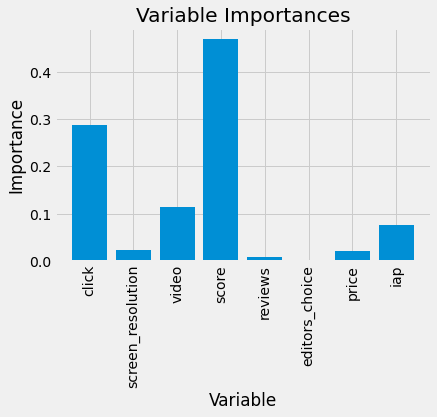

In [11]:
feature_list = list(train.columns)

# Get numerical feature importances
importances = list(rfr.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(train, round(importance, 2)) for train, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];



plt.style.use('fivethirtyeight')
x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, feature_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
